# U.S. Medical Insurance Costs

In this project, a CSV file with medical insurance costs will be investigated using Python. The goal is to analyse various attributes within `insurance.csv` to learn more about the patient information and how each health factor effects the insurance cost. We can then offer patients advice on how to reduce their insurance costs, by improving any detrimental health factors or by switching providers.

## Preparing the data

The `pandas` library is a very effective way of preparing and analysing data. However, I will not be using it in this project as I intend to demonstrate my ability to understand and manually manipulate the data.

In [19]:
# import libraries
import csv, numpy as np, matplotlib.pyplot as plt

To start, the `CSV` library is imported in order to work with the `insurance.csv` data, as well as the `NumPy` and `Matplotlib` libraries to assist with analysing and plotting of the data respectively.

In [20]:
# load CSV data and get headings
with open("C:/Users/danny/Documents/Work/Data Science/Projects/US medical data project/python-portfolio-project-starter-files/insurance.csv", newline="") as data:
    insurance_data = csv.DictReader(data)
    headings = insurance_data.fieldnames
    
    # create empty lists for each column in insurance.csv
    for header in headings:
        globals()["%s" % header] = []
    print(headings)
    
    # append the data to it's corresponding list
    for row in insurance_data:
        age.append(row["age"])
        sex.append(row["sex"])
        bmi.append(row["bmi"])
        children.append(row["children"])
        smoker.append(row["smoker"])
        region.append(row["region"])
        charges.append(row["charges"])

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


`insurance.csv` contains information about each patient in the following columns:
* __Age__ - Patient's age
* __Sex__ - Patient's sex 
* __BMI__ - Patient's BMI
* __Children__ - Patient's number of children
* __Smoker__ - Patient's smoking status
* __Region__ - Patient's U.S. geopraphical region
* __Charges__ - Patient's yearly medical insurance cost

There are six independent variables (age, sex, BMI, children, smoker, region) and one dependent variable (charges); this information was found without having to look at the CSV file by creating empty lists based on the column headings. These variables were then filled with the data from the corresponding column in `insurance.csv`.

In [21]:
# create a list of variables to loop through and print each variable and it's length
variables = [age, sex, bmi, children, smoker, region, charges]
for variable in variables:
    print(variable[:10])
    print("Length:", len(variable))

['19', '18', '28', '33', '32', '31', '46', '37', '37', '60']
Length: 1338
['female', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'female']
Length: 1338
['27.9', '33.77', '33', '22.705', '28.88', '25.74', '33.44', '27.74', '29.83', '25.84']
Length: 1338
['0', '1', '3', '0', '0', '0', '1', '3', '2', '0']
Length: 1338
['yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']
Length: 1338
['southwest', 'southeast', 'southeast', 'northwest', 'northwest', 'southeast', 'southeast', 'northwest', 'northeast', 'northwest']
Length: 1338
['16884.924', '1725.5523', '4449.462', '21984.47061', '3866.8552', '3756.6216', '8240.5896', '7281.5056', '6406.4107', '28923.13692']
Length: 1338


To check the types of values in each list, the first ten datapoints of each variable were printed. From this we can determine:
* __Age__ - Numerical
* __Sex__ - Categorical (*male*, *female*) 
* __BMI__ - Numerical
* __Children__ - Numerical
* __Smoker__ - Categorical (*yes*, *no*)
* __Region__ - Categorical (*northwest*, *northeast*, *southwest*, *southeast*)
* __Charges__ - Numerical

However, as the file was opened using `csv.DictReader`, the data within each list are __string__ objects and will need to be converted to __integers__ or __floats__ in order to perform the analysis (see below).

The length of each list was also tested. All the variables have a length of 1338, indicating there are __1338 samples__ in the dataset and suggests there is no missing data.

In [22]:
# function to convert the data for analysis
def conversion():
    
    # convert lists of strings to NumPy arrays of integers or floats
    new_variables = [np.array([int(x) for x in age]),
               np.array([0 if x == "male" else 1 for x in sex]),
               np.array([float(x) for x in bmi]),
               np.array([int(x) for x in children]),
               np.array([0 if x == "no" else 1 for x in smoker]),
               np.array([0 if x == "northwest" else 1 if x == "northeast" else 2 if x == "southwest" else 3 for x in region]),
               np.array([float(x) for x in charges])]
    
    # store updated variables in a dictionary
    patients_info = dict(age = new_variables[0],
                        sex = new_variables[1],
                        bmi = new_variables[2],
                        children = new_variables[3],
                        smoker = new_variables[4],
                        region = new_variables[5],
                        charges = new_variables[6])
     
    return patients_info

# function called to update variables and store in a dictionary
patients_info_dict = conversion()
print(patients_info_dict)

{'age': array([19, 18, 28, ..., 18, 21, 61]), 'sex': array([1, 0, 0, ..., 1, 1, 1]), 'bmi': array([27.9 , 33.77, 33.  , ..., 36.85, 25.8 , 29.07]), 'children': array([0, 1, 3, ..., 0, 0, 0]), 'smoker': array([1, 0, 0, ..., 0, 0, 1]), 'region': array([2, 3, 3, ..., 3, 2, 0]), 'charges': array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])}


The __conversion__ function takes each of the seven variables and converts the data from __string__ objects to __integers__ or __floats__, depending on the types of values:

* __Age__ - Integers
* __Sex__ - Integers (0 = *male*, 1 = *female*) 
* __BMI__ - Floats
* __Children__ - Integers
* __Smoker__ - Integers (0 = *no*, 1 = *yes*)
* __Region__ - Integers (0 = *northwest*, 1 = *northeast*, 2 = *southwest*, 3 = *southeast*)
* __Charges__ - Floats

These lists were also converted into __NumPy arrays__, for the improvements in memory consumption and runtime that these provide. The updated variables were then stored in a dictionary called __patients_info_dict__.


## Analysing the data

In [23]:
# function to calculate measures of average and spread
def analyse_data(data):
    
    # create a dictionary of the results
    values_dict = dict(mean = np.mean(data),
                           median = np.median(data),
                           stdev = np.std(data),
                           minimum = np.amin(data),
                           maximum = np.amax(data),
                           the_range = np.ptp(data))
        
    return values_dict

# for loop to analyse each variable from patients_info_dict and store the results in a dictionary
stats_dict = {}    
for key,value in patients_info_dict.items():
    stats_dict[key] = analyse_data(value)

print(stats_dict)

{'age': {'mean': 39.20702541106129, 'median': 39.0, 'stdev': 14.044709038954522, 'minimum': 18, 'maximum': 64, 'the_range': 46}, 'sex': {'mean': 0.4947683109118087, 'median': 0.0, 'stdev': 0.49997262868009534, 'minimum': 0, 'maximum': 1, 'the_range': 1}, 'bmi': {'mean': 30.66339686098655, 'median': 30.4, 'stdev': 6.0959076415894256, 'minimum': 15.96, 'maximum': 53.13, 'the_range': 37.17}, 'children': {'mean': 1.0949177877429, 'median': 1.0, 'stdev': 1.2050421724928497, 'minimum': 0, 'maximum': 5, 'the_range': 5}, 'smoker': {'mean': 0.20478325859491778, 'median': 0.0, 'stdev': 0.4035431520843401, 'minimum': 0, 'maximum': 1, 'the_range': 1}, 'region': {'mean': 1.5440956651718984, 'median': 2.0, 'stdev': 1.1304649214068008, 'minimum': 0, 'maximum': 3, 'the_range': 3}, 'charges': {'mean': 13270.422265141257, 'median': 9382.033, 'stdev': 12105.484975561612, 'minimum': 1121.8739, 'maximum': 63770.42801, 'the_range': 62648.554110000005}}


The __analyse_data__ function takes in a list of data and calculates the __mean__, __median__, __standard deviation__, __minimum value__, __maximum value__ and __range__ of the data and returns a dictionary of the results. Using a for loop, each variable was analysed and the results were stored in a dictionary called __stats_dict__.

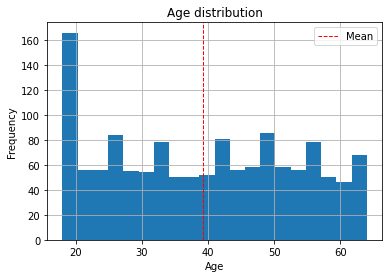

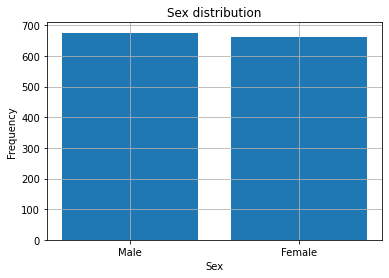

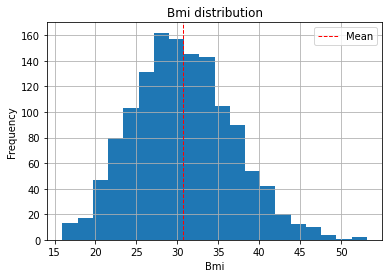

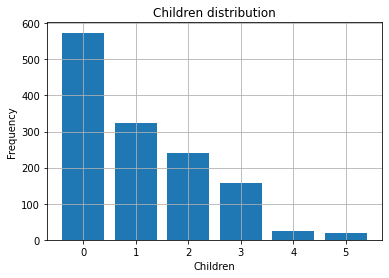

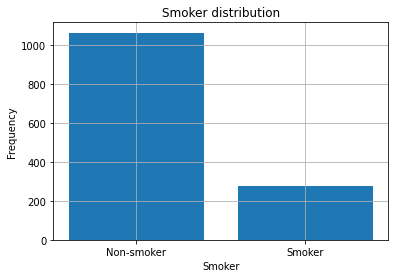

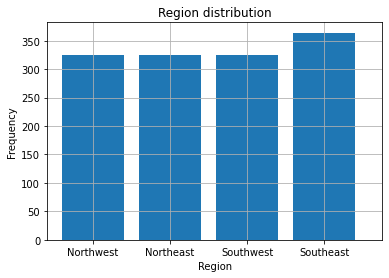

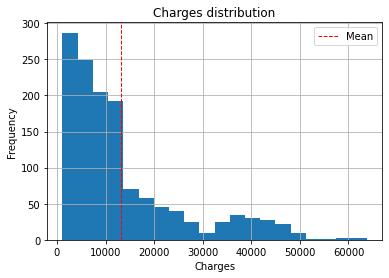

In [37]:
# function to plot the distribution of the data
def plot_distribution(variable_name):
    
    # calculate the number of samples for each recorded value
    count = {}
    for i in patients_info_dict[variable_name]:
        if i in count.keys():
            count[i] += 1
        else:
            count[i] = 1
    
    # plot bar chart for categorical data or histogram for numercial data with the mean
    fig, ax = plt.subplots()
    if variable_name == "sex" or variable_name == "children" \
        or variable_name == "smoker" or variable_name == "region":
        ax.bar(count.keys(), count.values())
    else:
        ax.hist(patients_info_dict[variable_name], bins=20)
        ax.axvline(np.mean(patients_info_dict[variable_name]), color='r', linestyle='--', linewidth=1)
        ax.legend(['Mean'], loc="upper right")
    
    # set the title, grid, axes labels and ticks
    ax.set(xlabel=f"{variable_name.title()}",
           ylabel="Frequency",
           title=f"{variable_name.title()} distribution")
    if variable_name == "sex":
        plt.xticks(np.arange(0, 1, step=0.5))
        plt.xticks(np.arange(2), ('Male', 'Female'))
    elif variable_name == "smoker":
        plt.xticks(np.arange(0, 1, step=0.5))
        plt.xticks(np.arange(2), ('Non-smoker', 'Smoker'))
    elif variable_name == "region":
        plt.xticks(np.arange(0, 4, step=0.25))
        plt.xticks(np.arange(4), ('Northwest', 'Northeast', "Southwest", "Southeast"))
    ax.grid()
    plt.show()

# for loop to input each variable into the function
for variable_name in headings:
    plot_distribution(variable_name)

As the name suggests, the __plot_distribution__ function plots the data. Depending on whether the data is numerical or categorical, a histogram or bar chart is plotted respectively, in order to display the __number of samples for each recorded value (condition)__ e.g. number of patients aged 18, number of patients aged 19 etc; a red line is plotted on each histogram to represent the mean. Using a for loop, the __plot_distribution__ function was called for each variable, allowing us to inspect the distributon of the data.

Along with the information from __stats_dict__, this provides us with plenty of insight into the data. The main points are:
* __Age__ - The average age is 39 years old; the youngest patients are 18 and the oldest are 64. There are roughly twice as many 18 and 19 year olds than any other age in the dataset, however the data is fairly evenly spread between the rest of the ages.
* __Sex__ - The number of males and females sampled is very evenly spread.
* __BMI__ - The average BMI is 30.7, which is categorised as obese; the lowest BMI is 16 and the highest is 53.1. The data forms a normal distribution.
* __Children__ - The most common number of children is 0 and the average is 1; this ranges from 0 to 5 children. The spread of the data deviates towards 2 or fewer children.
* __Smoker__ - 20% of the patients in the dataset are smokers.
* __Region__ - The number of patients from the Northwest, Southeast and Southwest regions is very evenly spread, with slightly more patients from the Northeast region.
* __Charges__ - The mean-average insurance cost is \\$13270.42. However, the data is highly skewed and the majority of data recorded is actually below this value. Therefore the median provides a better representation of the average as it is more resistant to outliers than the mean. The median-average insurance cost is \\$9382.03; the cheapest cost is \\$1121.87 and the most expsensive is \\$63770.43.

## Analysing how each health factor effects the insurance cost

I hypothesise that smoking status will have the greatest effect on insurance cost, with a significantly greater cost for smokers compared to non-smokers. Secondly, I expect that as age, BMI and number of children increase, insurance cost will also increase. Lastly, I don't expect sex or region to significantly effect insurance cost.

In [25]:
# function to calculate the average cost per condition
def analyse_charges(variable_name):
     
    index = 0
    charges_per_condition = {}
    
    for i in patients_info_dict[variable_name]:
        
        # create age ranges: 0 = 18-24, 1 = 25-31, 2 = 32-38, 3 = 39-45, 4 = 46-52, 5 = 53+
        if variable_name == "age":
            if i < 25:
                i = 0
            elif i >= 25 and i < 32:
                i = 1
            elif i >= 32 and i < 39:
                i = 2
            elif i >= 39 and i < 46:
                i = 3
            elif i >= 46 and i < 53:
                i = 4
            else:
                i = 5
        
        # create bmi categories: 0 = underweight, 1 = healthy, 2 = overweight, 3 = obese, 4 = morbidly obese
        if variable_name == "bmi":
            if i < 18.5:
                i = 0
            elif i >= 18.5 and i < 25:
                i = 1
            elif i >= 25 and i < 30:
                i = 2
            elif i >= 30 and i < 40:
                i = 3
            else:
                i = 4
        
        # add the condition to the dictionary keys and create a list of the corresponding charges 
        if i in charges_per_condition.keys():
            charges_per_condition[i].append(patients_info_dict["charges"][index])
        else:
            charges_per_condition[i] = [patients_info_dict["charges"][index]]
        index += 1
    
    # add the condition to the dictionary keys and get the average of the charges for that condition
    average_per_condition = {}
    for key,value in charges_per_condition.items():
        average_per_condition[key] = analyse_data(value)["mean"]      
    
    # take the most expensive condition and minus the cheapest condition to get the range
    the_range = max(average_per_condition.values()) - min(average_per_condition.values())
    
    # store this information in a dictionary
    analyse_charges = dict(average_per_condition = average_per_condition,
                           the_range = the_range)
        
    return analyse_charges

# for loop to analyse each variable's effect on charges and store the results in a dictionary
analyse_charges_dict = {}
for variable_name in headings[:-1]:
    analyse_charges_dict[variable_name] = analyse_charges(variable_name)
    
print(analyse_charges_dict)

{'age': {'average_per_condition': {0: 9011.340317334532, 1: 10065.69418715026, 2: 11818.41005269663, 4: 15575.129419603962, 5: 18302.14164214765, 3: 13778.31779322751}, 'the_range': 9290.801324813117}, 'sex': {'average_per_condition': {1: 12569.578843835347, 0: 13956.751177721893}, 'the_range': 1387.1723338865468}, 'bmi': {'average_per_condition': {2: 10987.509891318654, 3: 15370.294093766235, 1: 10409.337708977777, 4: 16784.615546483517, 0: 8852.200585}, 'the_range': 7932.414961483517}, 'children': {'average_per_condition': {0: 12365.97560163589, 1: 12731.171831635802, 3: 15355.318366815285, 2: 15073.563733958332, 5: 8786.035247222222, 4: 13850.6563112}, 'the_range': 6569.283119593063}, 'smoker': {'average_per_condition': {1: 32050.23183153284, 0: 8434.268297856204}, 'the_range': 23615.963533676637}, 'region': {'average_per_condition': {2: 12346.937377292308, 3: 14735.411437609888, 0: 12417.57537396923, 1: 13406.384516385804}, 'the_range': 2388.4740603175796}}


The __analyse_charges__ function takes in one of the independent variables and calculates the __average insurance cost for each condition__ e.g. average cost for patients aged 18, average cost for patients aged 19 etc. Patients were grouped into one of six age ranges: 18-24, 25-31, 32-38, 39-45, 46-52 or 53+. Similarly, patients were grouped into one of five BMI categories: underweight (<18.5), healthy (18.5-24.9), overweight (25-29.9), obese (30-39.9) or morbidly obese (40+). These groupings were performed in order to improve clarity when plotting the data* (see below). The __range__ was then calculated by subracting the average of the cheapest condition from the average of the most expensive condition. Using a for loop, each of the six independent variables were analysed and the results were stored in a dictionary called __analyse_charges_dict__.

*Alternatively the average insurance cost for each condition could have been plotted on a scatter graph, using __linear regression__ to model the relationship with insurance cost. However, I have not yet learned how to use `scikit-learn` in order to do this.

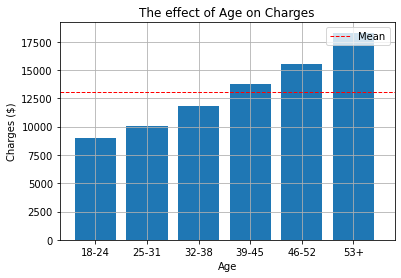

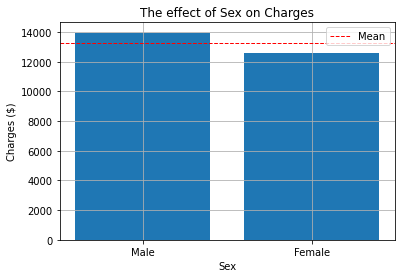

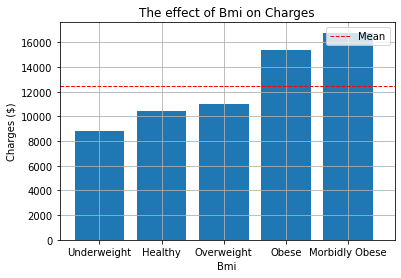

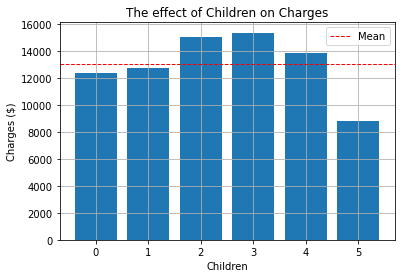

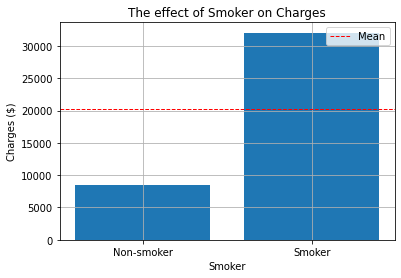

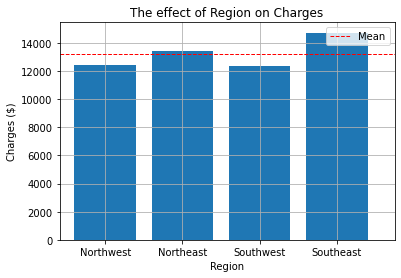

In [26]:
# plotted all factors against charges in order to see the effect
def plot_effect(variable_name):
    
    count = 0
    x, y = [], []
    
    # append each condition to x and the number of samples in each condition to y
    for i in range(len(analyse_charges_dict[variable_name]["average_per_condition"])):
        x.append(count)
        y.append(analyse_charges_dict[variable_name]["average_per_condition"][count])
        count += 1
    
    # plot bar chart with the mean
    fig, ax = plt.subplots()
    ax.bar(x, y)
    ax.axhline(y=np.mean(list(analyse_charges_dict[variable_name]["average_per_condition"].values())),
               color='r', linestyle='--', linewidth=1)
    ax.legend(['Mean'], loc="upper right")
     
    # set the title, grid, axes labels and ticks
    ax.set(xlabel=f"{variable_name.title()}",
           ylabel="Charges ($)",
           title=f"The effect of {variable_name.title()} on Charges")
    if variable_name == "age":
        plt.xticks(np.arange(0, 6, step=0.2))
        plt.xticks(np.arange(6), ('18-24', '25-31', '32-38', '39-45', '46-52', '53+'))
    elif variable_name == "sex":
        plt.xticks(np.arange(0, 1, step=0.5))
        plt.xticks(np.arange(2), ('Male', 'Female'))
    elif variable_name == "bmi":
        plt.xticks(np.arange(0, 5, step=0.25))
        plt.xticks(np.arange(5), ('Underweight', 'Healthy', 'Overweight', 'Obese', 'Morbidly Obese'))
    elif variable_name == "smoker":
        plt.xticks(np.arange(0, 1, step=0.5))
        plt.xticks(np.arange(2), ('Non-smoker', 'Smoker'))
    elif variable_name == "region":
        plt.xticks(np.arange(0, 4, step=0.25))
        plt.xticks(np.arange(4), ('Northwest', 'Northeast', "Southwest", "Southeast"))        
    ax.grid()
    plt.show()

# for loop to input each of the independent variables into the function
for variable_name in headings[:-1]:
    plot_effect(variable_name)

The __plot_effect__ function plots the __average charges for each independent variable's conditions__, in order to inspect the effect; a red line is plotted on each bar chart to represent the mean. The variable with the greatest range in charges suggests that it has the greatest effect on insurance cost**. Using this assumption, we can order the variables based on their effect: 
* __Smoker__ - Range of \$23615.96
* __Age__ - Range of \$9290.80
* __BMI__ - Range of \$7932.41
* __Children__ - Range of \$6569.28
* __Region__ - Range of \$2388.47
* __Sex__ - Range of \$1387.17

As expected, smoking status has the greatest effect on insurance cost, with smokers' insurance costing significantly more than non-smokers' insurance. Age and BMI also behaved as predicted, both positively correlating with insurance cost. The effect of the number of children on insurance costs formed a positive correlation from 0-3 children but negatively correlated beyond this, forming a inverted-U shape; this may be due to a smaller sample size for patients with 4 and 5, with only 25 and 18 patients sampled respectively. The plots show that males insurance costs are slightly higher than females and insurance costs for pateints in the East are slightly higher than those in the West; these differences can be tested for significance by performing a multiple regression**.

\**As we have multiple independent variables and one dependent variable, a __multiple regression__ could have been performed in order to calculate the coefficients of each variable; this measures the effect each variable has on the insurance cost. However, I have not yet learned how to use `scikit-learn` in order to do this.

## Business Applications

There are numerous ways this data can be further investigated and utilised to achieve business outcomes. In this project, we will highlight which patients are overpaying for their insurance (these can then be targetted by insurance providers), provide advice to the patients regarding their health and insurance cost, and predict insurance cost based on a patients health factors.  

In [27]:
# function to find patients overpaying for insurance
def targetting():
    
    actual = []
    insurance_estimates = []
    targets_dict = {}
    
    for i in range(len(age)):
        
        # formula to predict insurance cost based on health factors (from Codecademy, missing region) 
        estimate = (250*patients_info_dict["age"][i]
                     - 128*patients_info_dict["sex"][i]
                     + 370*patients_info_dict["bmi"][i]
                     + 425*patients_info_dict["children"][i]
                     + 24000*patients_info_dict["smoker"][i]
                     - 12500)
        
        # append actual and estimated charges to their corresponding list
        actual.append(patients_info_dict["charges"][i])
        insurance_estimates.append(estimate)
    
    # find patients overpaying by more than 5% and overpayment amount
    index = 0
    for i,j in zip(actual, insurance_estimates):
        if i > j*1.05:
            targets_dict[index] = i-j
        index += 1
    
    return targets_dict

targets_dict = targetting()
print(targets_dict)

{3: 17833.62061, 9: 16990.33692, 14: 5773.657700000003, 17: 322.5215500000004, 19: 4776.466999999997, 23: 5594.476799999997, 26: 2788.38515, 28: 2667.742149999999, 29: 5180.0, 30: 5413.576000000001, 31: 589.6398499999991, 34: 18801.559139999998, 35: 1818.18375, 37: 606.3000000000002, 38: 5531.376299999996, 39: 6910.360999999997, 45: 5579.283510000001, 48: 1181.7967000000008, 49: 4760.1759999999995, 53: 4503.475700000003, 55: 6973.14445, 57: 5731.567200000005, 62: 17102.61817, 82: 5820.763800000001, 84: 5488.519, 86: 6427.739400000006, 91: 720.9820499999987, 94: 7488.055, 102: 18330.2967, 109: 6822.232099999994, 115: 17179.845559999998, 119: 567.5312999999987, 121: 918.1244999999999, 123: 5031.994500000001, 128: 5939.136299999998, 130: 886.5949500000006, 131: 2839.5586000000003, 138: 13372.73386, 140: 22230.50478, 143: 11555.926000000003, 146: 5162.40105, 158: 4804.1567, 159: 8305.28338, 161: 6642.983500000002, 169: 2308.0549499999997, 172: 3789.5963999999994, 175: 7753.449999999997, 18

The __targetting__ function calculates which patients are overpaying by more than 5% for their insurance. This was done by comparing their actual insurance cost with the estimated cost.

$ estimated.cost = 250(age) − 128(sex) + 370(bmi) + 425(children) + 24000(smoker) − 12500 $ ***

This returns the __targets_dict__ dictionary, which contains all the patients who are overpaying for their insurance and their corresponding overpayment amounts. These patients can then be targetted by an insurance provider to convince them to switch to their service. 

*** This equation was taken from Codecademy and excludes the region data. This will therefore fail to accurately predict insurance costs and reduce the validity of the targetting function. Instead, we should perform a __multiple regression__ to calculate the coefficents of each independent variable and use these to develop our own formula for predicting insurance costs; this will better represent our dataset and improve the validity of the targetting function. However, I have not yet learned how to use `scikit-learn` in order to do this.

In [28]:
# class to provide different advice to patients based on their health factors
class Advice:
    
    # initialize the attributes of the class
    def __init__(self, patient_index, variable_names=headings):
        self.patient_index = patient_index
        self.patients_info_dict = patients_info_dict
        self.variable_names = variable_names
        self.targets_dict = targets_dict
    
    # method to return BMI advice and smoking advice
    def health_cost_advice(self):
        
        individual = []
        
        # get the values for each of the variables in patients_info_dict
        for i in self.variable_names:
            individual.append(self.patients_info_dict[i][self.patient_index])
        
        # set bmi_message depending on the patient's BMI category /
        # with the difference between the average charge for this condition and the healthy condition
        if individual[2] < 18.5:
            bmi_message = "BMI advice:\nYour BMI is {BMI} (underweight). To achieve a healthy BMI, you should consider increasing your BMI score by around {healthy}. However, this will not reduce your insurance cost.".format(
                BMI = round(individual[2], 1), 
                healthy = round(21.7 - individual[2], 1))
        elif individual[2] >= 25:
            bmi_message = "BMI advice:\nYour BMI is {BMI} ({category}). To achieve a healthy BMI and reduce your insurance cost by an estimated ${estimate}, you should consider reducing your BMI score by around {healthy}.".format(
                BMI = round(individual[2], 1),
                category = "overweight" if individual[2] < 30 else "obese" if individual[2] < 40 else "morbidly obese",
                estimate = (round(analyse_charges_dict["bmi"]["average_per_condition"][2] - analyse_charges_dict["bmi"]["average_per_condition"][1], 2) if individual[2] < 30
                            else round(analyse_charges_dict["bmi"]["average_per_condition"][3] - analyse_charges_dict["bmi"]["average_per_condition"][1], 2) if individual[2] < 40 
                            else round(analyse_charges_dict["bmi"]["average_per_condition"][4] - analyse_charges_dict["bmi"]["average_per_condition"][1], 2)),
                healthy = abs((round(21.7 - individual[2], 1))))
        else:
            bmi_message = "BMI advice:\nYour BMI is {} (healthy). You should try to maintain this for health reasons and to keep your insurance cost down.".format(
                round(individual[2], 1))
        
        # set smoking_message depending on the patient's smoking status /
        # with the difference between the average charge for smokers and non-smokers
        if individual[4] == 1:
            smoking_message = "Smoking advice:\nTo improve your health and reduce your insurance cost by an estimated ${estimate}, you should stop smoking.".format(
                estimate = round(analyse_charges_dict["smoker"]["average_per_condition"][1] - analyse_charges_dict["smoker"]["average_per_condition"][0], 2))
        else:
            smoking_message = "Smoking advice:\nCongratulations for not smoking. This is having a positive effect on your health and your insurance cost."
    
        return f"{bmi_message}\n\n{smoking_message}\n"
    
    # method to return insurance provder advice
    def provider_advice(self):
        
        # set message depending on if the patient is overpaying and by how much
        if self.patient_index in self.targets_dict.keys():
            message = "Insurance provider advice:\nBased on your age, sex, BMI, number of children, smoking status and region, you are overpaying on your health insurance by an estimated ${}; we recommend you change provider.".format(
                round(self.targets_dict[self.patient_index], 2))
        else:
            message = "Insurance provider advice:\nBased on your age, sex, BMI, number of children, smoking status and region, you are not overpaying for your health insurance; we recommend you stay with your provider."
        
        return message

# for loop to get advice for all patients and append them to the corresponding lists
health_cost_advice = []
provider_advice = []
for i in range(len(age)):
    patient_advice = Advice(i)
    health_cost_advice.append(patient_advice.health_cost_advice())
    provider_advice.append(patient_advice.provider_advice())   

# create an instance of the Advice class for patient_14
patient_14 = Advice(14)
print(patient_14.health_cost_advice())
print(patient_14.provider_advice())

BMI advice:
Your BMI is 42.1 (morbidly obese). To achieve a healthy BMI and reduce your insurance cost by an estimated $6375.28, you should consider reducing your BMI score by around 20.4.

Smoking advice:
To improve your health and reduce your insurance cost by an estimated $23615.96, you should stop smoking.

Insurance provider advice:
Based on your age, sex, BMI, number of children, smoking status and region, you are overpaying on your health insurance by an estimated $5773.66; we recommend you change provider.


The __Advice__ class is comprised of two methods: the __health_cost_advice__ method and the __provider_advice__ method. 

The __health_cost_advice__ method returns two messages based on the patients health factors. The first message is BMI advice and the second is smoking advice, which each suggest how the patient can improve these health factors and how this would effect their insurance cost. Changes were only recommended for these factors, as age and sex are unchangeable, and justifying changes to a patient's number of children or region in order to reduce their insurance cost is unreasonable. In addition, smokng status and BMI were the most and third most influential factors on insurance cost respectively and would therefore be worthwhile improving for both health and insurance cost reasons. 

The __provider_advice__ method returns a message advising patients to switch insurance provider if they are currently overpaying, based on the estimated cost for somebody with their health factors. It also provides an estimate of how much they could save by switching.

A for loop was used to get advice for all patients in the dataset and append the messages to the corresponding lists. Following this, an instance of the __Advice__ class was created for __patient_14__ and printed to the terminal.

In [30]:
# class to store patients health factors in a dictionary and estimate insurance cost
class Patient:
    
    # initialize the attributes of the class
    def __init__(self, age, sex, bmi, children, smoker):
        self.age = age
        self.sex = sex
        self.bmi = bmi
        self.children = children
        self.smoker = smoker
    
    # method to store patients health factors in a dictionary
    def patient_info(self):
        
        patient_dict = dict(age=self.age,
                            sex=self.sex,
                            bmi=self.bmi,
                            children=self.children,
                            smoker=self.smoker)
        
        return patient_dict
    
    # method to estimate patients insurance cost usin formula (from Codecademy, missing region)
    def estimated_cost(self):
        
        estimated_cost = (250*self.age
                          - 128*self.sex
                          + 370*self.bmi
                          + 425*self.children
                          + 24000*self.smoker
                          - 12500)
        
        return f"Based on your age, sex, BMI, number of children and smoking status, your estimated insurance cost is ${int(estimated_cost)}."

# create an instance of the Patient class for myself
danny_simpson = Patient(24, 0, 20.2, 0, 0)
print(danny_simpson.patient_info(), danny_simpson.estimated_cost(), sep="\n")

# create an instance of the Patient class for my grandad
danny_simpson_grandad = Patient(88, 0, 22.8, 4, 1)
print(danny_simpson_grandad.patient_info(), danny_simpson_grandad.estimated_cost(), sep="\n")

{'age': 24, 'sex': 0, 'bmi': 20.2, 'children': 0, 'smoker': 0}
Based on your age, sex, BMI, number of children and smoking status, your estimated insurance cost is $974.
{'age': 88, 'sex': 0, 'bmi': 22.8, 'children': 4, 'smoker': 1}
Based on your age, sex, BMI, number of children and smoking status, your estimated insurance cost is $43636.


The __Patient__ class is comprised of two methods: the __patient_info__ method and the __estimate_cost__ method. 

The __patient_info__ method simply returns a dictionary of the information provided and the __estimate_cost__ method calculates the estimated insurance cost based on these health factors. Instances of the __Patient__ class were created using health information for myself and my grandad. The estimated cost of my insurance is just \\$974 while my grandad's would cost him \\$43636!